Traveling the world on a mission to discover new data

1. Set up a data science project structure in a new git repository in your GitHub account
2. Install Jupyter notebook prerequisites (Anaconda, Python, etc.)
3. Select an industry
4. Select two to three public data sets from that industry
5. Load the data sets into panda data frames following the 10 minutes to pandas guide
6. Formulate one or two ideas on how the data sets could be combined to establish
additional value using exploratory data analysis
7. Transform the data sets into a single data set while following data preparation processes
to clean and transform features (use pandas documentation for help)
8. Document your process and results
9. Commit your notebook, source code, visualizations and other supporting files to the git
repository in GitHub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Data Loading

In [2]:
# Selected data set 
# https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore.csv
df_apps = pd.read_csv('google-play-store-apps/googleplaystore.csv')
df_reviews = pd.read_csv('google-play-store-apps/googleplaystore_user_reviews.csv')

`df_apps` contains information about apps published in Google Store. Merging it with `df_reviews`, we can analyse which kind of apps get good reviews (sentiment analysis), from different perspectives, such as price, category and content rating.

In [3]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


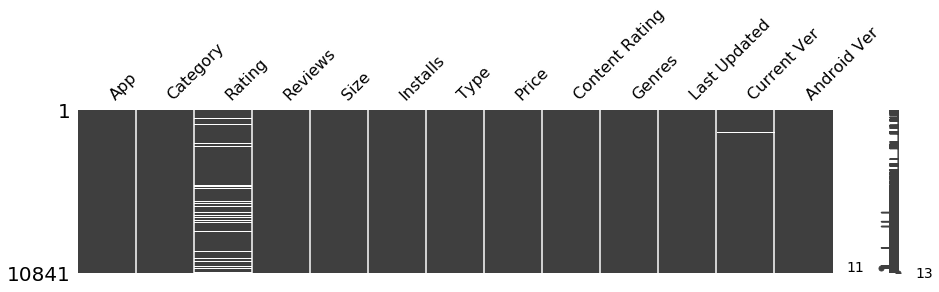

In [4]:
msno.matrix(df_apps, figsize=(15, 3));

In [5]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


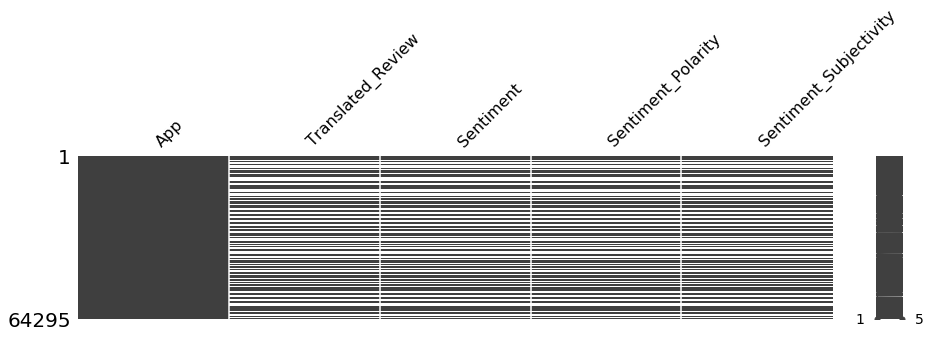

In [6]:
msno.matrix(df_reviews, figsize=(15, 3));

`df_reviews` contain multiple reviews for a single app. To start, we are going to transform it to get an overall review per app. We are just going to analyse apps with reviews. 

In [7]:
df_reviews['App'].nunique()

1074

In [8]:
df_reviews.dropna(inplace=True)

In [9]:
df_reviews['App'].nunique()

865

We can see that 209 apps don't have any review.

In [10]:
df_reviews = df_reviews.groupby('App', as_index=False).agg(
    {'Sentiment': pd.Series.mode, 
     'Sentiment_Polarity': 'mean',
     'Sentiment_Subjectivity': 'mean'
    })

In [11]:
df_reviews.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Positive,0.392405,0.545516
2,11st,Positive,0.185943,0.455340
3,1800 Contacts - Lens Store,Positive,0.318145,0.591098
4,1LINE – One Line with One Touch,Positive,0.196290,0.557315


Now we are going to merge our data sets and start the exploratory analysis.

In [12]:
# Since we are interested only in apps with reviews, we are going to perform
# an inner join.
df = df_apps.merge(df_reviews, on='App', how='inner')

In [13]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Positive,0.152652,0.641540
1,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Positive,0.152652,0.641540
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Positive,0.268483,0.523447
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,Positive,0.412649,0.679226
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,Positive,0.283509,0.479298


### Exploratory Data Analysis

First, let's check some distributions related to the apps reviews.

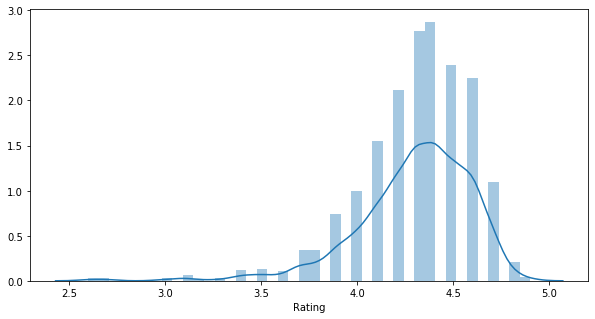

In [14]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Rating'].dropna());

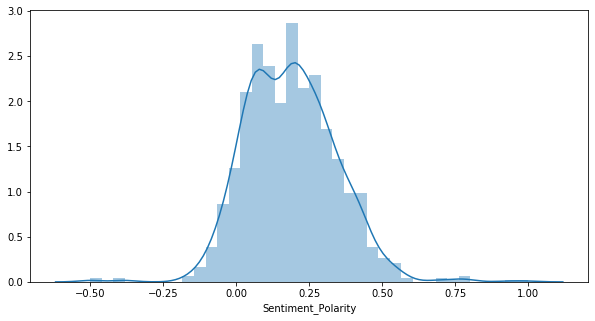

In [15]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Sentiment_Polarity'].dropna());

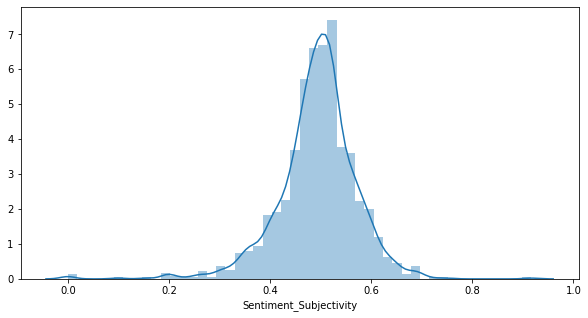

In [16]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Sentiment_Subjectivity'].dropna());

From those, we see that the most apps are well rated, while usualy the sentiment polarity is quite neutral. 

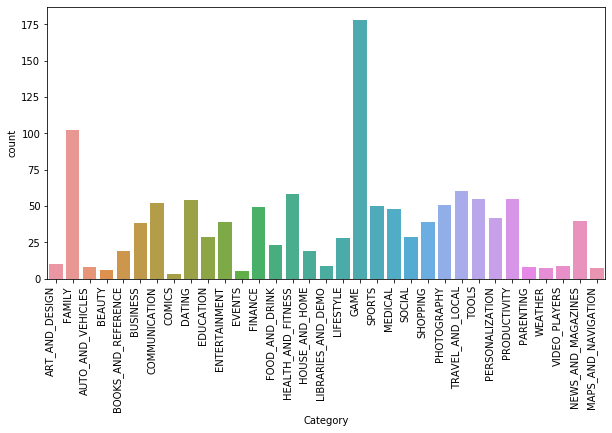

In [17]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x='Category', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");

From the figure above, we see that the most commom category is `game`. Not quite surprsing. 

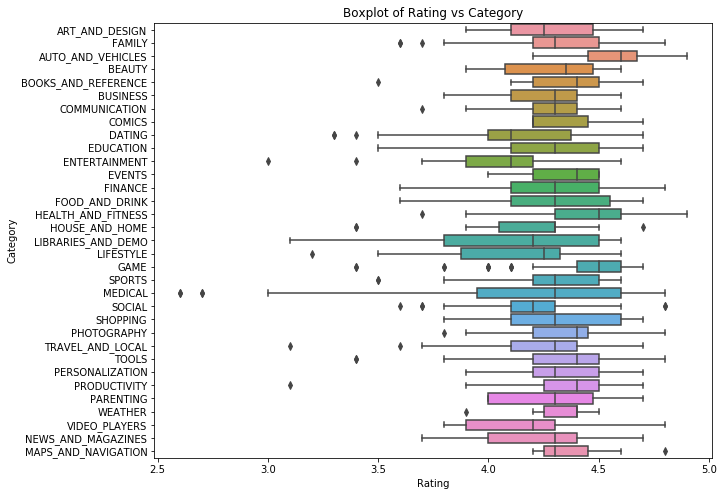

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Category',x='Rating', data=df)
plt.title('Boxplot of Rating vs Category');

Here, we see that there is a high variation of rating among apps. `Auto and Vehicles` present the highest mean, while Entertainment present the lowest.

In [19]:
df['Reviews'] = df['Reviews'].astype(int)

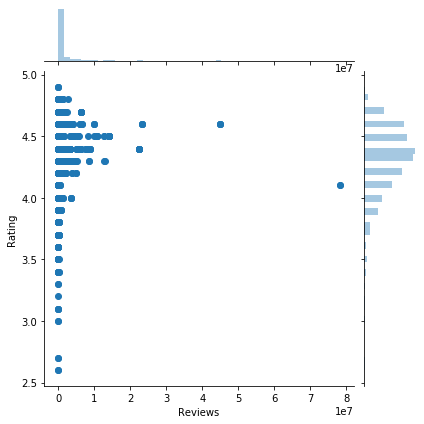

In [20]:
sns.jointplot(x='Reviews', y='Rating', data=df);

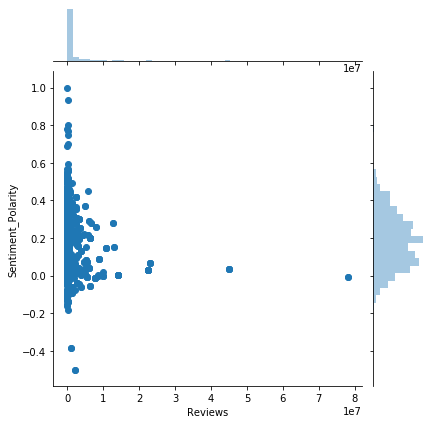

In [21]:
sns.jointplot(x='Reviews', y='Sentiment_Polarity', data=df);

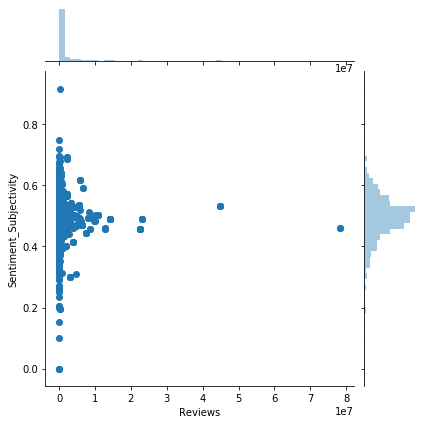

In [22]:
sns.jointplot(x='Reviews', y='Sentiment_Subjectivity', data=df);

The plots above show the distribution of the number of reviews jointly with the rating, sentiment polarity and sentiment subjectivy. We can see that the majority of apps don't have many reviews, despite having a good rating and good sentiment subjectivity. This shows that, despite the small number of reviews, those reviews present the similar "sentiments". An interesting thing is that apps with a huge number of reviews present a lower sentiment polarity score. 

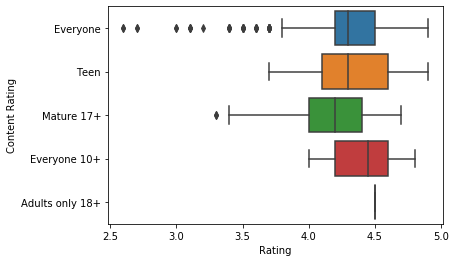

In [23]:
sns.boxplot(y='Content Rating', x='Rating', data=df)

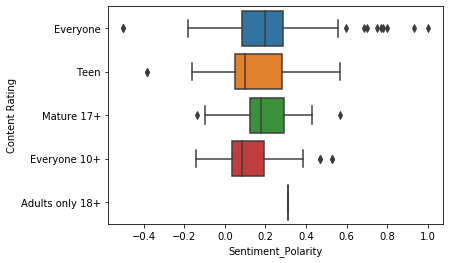

In [24]:
sns.boxplot(y='Content Rating', x='Sentiment_Polarity', data=df)

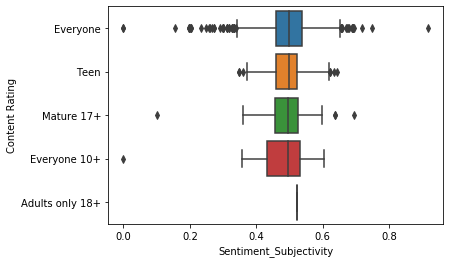

In [25]:
sns.boxplot(y='Content Rating', x='Sentiment_Subjectivity', data=df)

From the plots above, we can see that, while both rating and sentiment polarity varies among content rating, the sentiment subjectivity is similar among them, with some outliers appearing mostly for the Content Rating `Everyone`. 

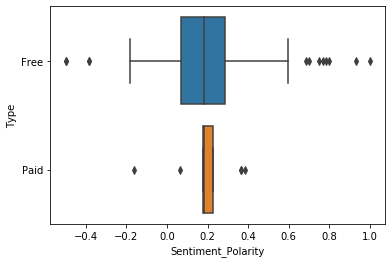

In [26]:
sns.boxplot(y='Type', x='Sentiment_Polarity', data=df)

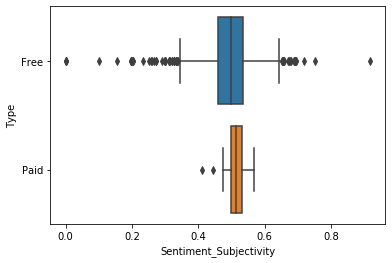

In [27]:
sns.boxplot(y='Type', x='Sentiment_Subjectivity', data=df)

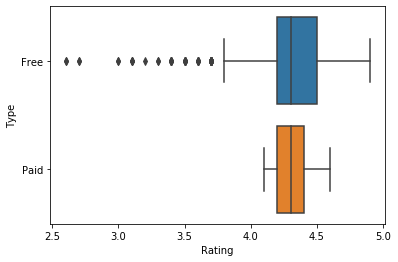

In [28]:
sns.boxplot(y='Type', x='Rating', data=df)

From the plots above, it doesn't seem that the type of the app (Paid or Free), has an impact in its overall evaluation. Howwever, it's clear that free apps present a broader range of evaluation scores. 

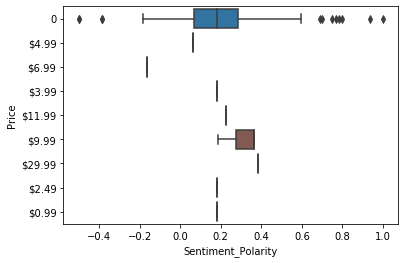

In [29]:
sns.boxplot(y='Price', x='Sentiment_Polarity', data=df)

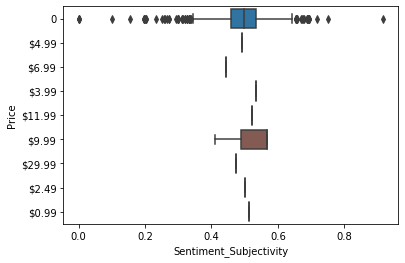

In [30]:
sns.boxplot(y='Price', x='Sentiment_Subjectivity', data=df)

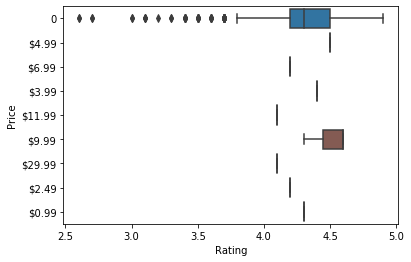

In [31]:
sns.boxplot(y='Price', x='Rating', data=df)

From the plots above is once again clear that free apps present a broad range of evaluation. While the most expensive apps present the higher sentiment polarity, this is not observed for the sentiment subjectivity and rating.

### Conclusion 

In this assignment we have explore pandas in depth, performing some data cleansing, aggregations and merging different data frames. We have also used a varied set of charts to analyse the relationship among the data frame columns.